In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
N, D_in, H, D_out = 2,100, 50, 1

In [40]:
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)
print(x)
print("===")
print(y)

(2, 100)
(2, 1)
[[ 0.36736331  0.70096061  0.64128997 -0.51617791 -1.191739    1.99934875
   0.61510837  3.0176813  -0.33524604  0.11376552  0.82504226  1.01322933
  -0.19393512  0.00816412 -0.70669009 -0.40914216 -1.71924556 -0.40695582
  -0.42734873 -0.20627163  0.83269355  0.93419173 -0.1008583   0.63102916
   1.31657323 -0.123373   -0.32978276 -0.88239075  1.3709235  -0.09171199
   0.20191262  0.98708627  0.2997659   0.55743213  1.60419918 -0.77309806
  -0.22060347 -1.00030706  0.0883961  -0.92410016 -0.81408672 -1.61516847
   2.52133708  0.90668199 -2.67040918 -0.14728829  0.89133295 -1.39409123
  -1.38523431 -0.15958167  0.03035402  0.73141778 -0.12442856 -0.20168193
  -1.49051142  0.61531392 -1.26795824  0.40463253 -0.95221447 -1.05210236
   1.27104534 -1.63554533 -0.20204667 -0.43220038 -0.2373739  -0.93618189
   2.09616862 -0.05479969  2.11588042  0.10399407 -1.20070383  0.09959506
  -1.66368746 -0.76032543  0.83595402  0.46594237  0.40180158 -1.22024672
  -1.13955202 -0.29098

In [41]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)


y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(1000):
    h = x.dot(w1)
    h_relu = np.maximum(h,0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])
    
    loss = np.square(y_pred-y).sum()
    loss_list.append(loss)
    print(t, loss)
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h) 
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 843.2719362993025
1 827.5171424129242
2 812.0752856799545
3 796.9397889989591
4 782.1042205757967
5 767.5622905625589
6 753.3078477780664
7 739.334876507883
8 725.6374933817734
9 712.2099443266394
10 699.0466015929517
11 686.1419608528869
12 673.4906383682313
13 661.0873682263823
14 648.9269996426292
15 637.0044943271124
16 625.3149239147457
17 613.8534674565794
18 602.6154089710195
19 591.596135053407
20 580.7911325424924
21 570.1959862423759
22 559.8063766985388
23 549.6180780265898
24 539.6269557924475
25 529.8289649426408
26 520.2201477835204
27 510.79663200813667
28 501.554628769622
29 492.4904307999233
30 483.60041057276646
31 474.88101850975977
32 466.3287812285791
33 457.94029983220594
34 449.7122482381895
35 441.64137154699074
36 433.7244844484183
37 425.9584696652314
38 418.340276433038
39 410.86691901554394
40 403.5354752543661
41 396.34308515249256
42 389.286949490649
43 382.3643284757195
44 375.5725404204705
45 368.90896045382664
46 362.37101926094516
47 355.956201852380

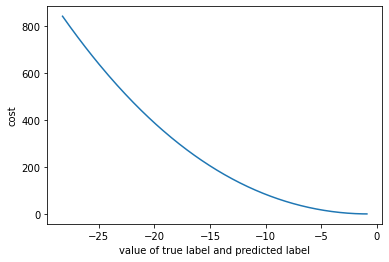

In [42]:
#step_list = [i for i in range(len(loss_list))]
plt.plot(y_pred_list, loss_list)
plt.ylabel('cost')
plt.xlabel('value of true label and predicted label')
plt.show()